In [1]:
from hydra import initialize, compose
from src.predict_sklearn import SklearnGPRegressor

# Model configs can be changed in .yaml files in '../conf' or in the code as shown below
# Default configs of hyperparameters correspond to the best models as presented in the publication

with initialize(config_path="../conf", version_base="1.1"):
    cfg = compose(config_name="config")


Retraining on whole dataset (train + holdout test set).
Training in progress....
Init noise: 0.01


/home/alex/Pt_NMR/.venv/lib/python3.14/site-packages/sklearn/gaussian_process/_gpr.py:670: ConvergenceWarning: lbfgs failed to converge after 9 iteration(s) (status=2):
ABNORMAL: 

You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)



Optimized noise variance: 0.015 

Optimized kernel bias: 1.766 

Log marginal likelihood: 135.478 

Fit saved to /home/alex/Pt_NMR/data/fits/total/. 

Generating learning curves. May take some time. 

_________________________________________________________________


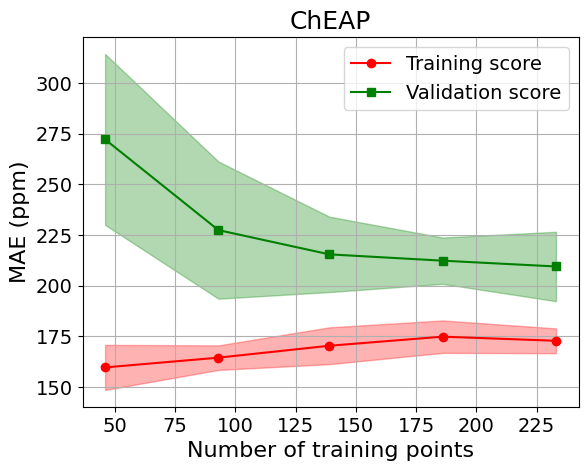

Metric               Value (ppm)
-----------------------------------
Training MAE         191
MAE St. Dev.         19
Training RMSE        252
RMSE St. Dev.        35
Outliers (18):
------------
Compound Name: trans-Pt(py)2Cl2, Observed: -1948, Predicted: -2302.569671132909, Residual: 354.5696711329092
Compound Name: cis-Pt(3-picoline)Cl2, Observed: -2008, Predicted: -2302.569671132909, Residual: 294.5696711329092
Compound Name: trans-Pt(4-picoline)Cl2, Observed: -1948, Predicted: -2302.569671132909, Residual: 354.5696711329092
Compound Name: [Pt(SbMe3)Br3]-, Observed: -3928, Predicted: -4213.394887957729, Residual: 285.3948879577292
Compound Name: [Pt(SOMe2)Br3]-, Observed: -3641, Predicted: -3367.3729353409217, Residual: -273.6270646590783
Compound Name: trans-[Pt(AsMe3)Cl2], Observed: -3780, Predicted: -4088.934569066203, Residual: 308.93456906620304
Compound Name: trans-[Pt(SMe2)I2], Observed: -5789, Predicted: -4639.391748198179, Residual: -1149.608251801821
Compound Name: trans-P

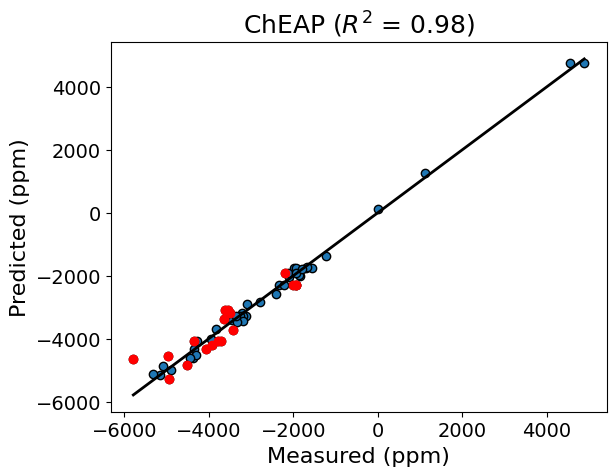

-----------------------------------
Correlation: 0.98
Average Uncertainty (ppm): 233
-----------------------------------
Empirical coverage of model for holdout set: 0.9661


Metric               Value (ppm)
-----------------------------------
Test MAE             200
Test RMSE            264
$R^{2}$              1


In [2]:
# ChEAP model

cfg.representations.rep = "ChEAP"
cfg.zeta = 2  # Kernel degree (default is 2, override in this line)
cfg.report = "full"  # Only errors are displayed (report="full" for learning curves and parity plots)

model = SklearnGPRegressor(config=cfg)

model.gpr_train(**cfg.backend.training, report=cfg.report) # Train model
model.gpr_test(**cfg.backend.testing, report=cfg.report); # Test trained model on the holdout set

In [ ]:
# GAPE model

cfg.representations.rep = "GAPE"
cfg.zeta = 2  # Kernel degree (default is 2, override in this line)
cfg.report = "errors"  # Only errors are displayed (report="full" for learning curves and parity plots)

model = SklearnGPRegressor(config=cfg)

model.gpr_train(**cfg.backend.training, report=cfg.report) # Train model
model.gpr_test(**cfg.backend.testing, report=cfg.report); # Test trained model on the holdout set

In [ ]:
# SOAP model

cfg.representations.rep = "SOAP"
cfg.zeta = 2  # Kernel degree (default is 2, override in this line)
cfg.report = "errors"  # Only errors are displayed (report="full" for learning curves and parity plots)

model = SklearnGPRegressor(config=cfg)

model.gpr_train(**cfg.backend.training, report=cfg.report) # Train model
model.gpr_test(**cfg.backend.testing, report=cfg.report); # Test trained model on the holdout set